# K Means-SMOTE

Creates new samples by interpolation of samples with SMOTE within selected clusters

In [76]:
# import libraries

import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# from imblearn
from imblearn.over_sampling import KMeansSMOTE

In [88]:
# creating toy dataset
# this dataset will have 3 clusters

X, y = make_blobs(n_samples=2100, n_features=2, centers=[(0,0),(5,5),(0,5)], random_state= 42,  cluster_std=1.5)

X.shape, y.shape

((2100, 2), (2100,))

In [91]:
# creating a data frame 

X = pd.DataFrame(data = X, columns = ['varA', 'varB'])
y = pd.Series(y)

# now, under sample the data for y ==1 
X = pd.concat([X[y == 0],
               X[y==1].sample(400, random_state=42),
              X[y==2].sample(100, random_state=42)],
              axis = 0)

y = y.loc[X.index]

# reset indexes
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

             
# create imbalanced target
y = pd.concat([
    pd.Series(np.random.binomial(1, 0.3, 700)),
    pd.Series(np.random.binomial(1, 0.2, 400)),
    pd.Series(np.random.binomial(1, 0.1, 100)),
], axis=0).reset_index(drop=True)


# display the shape
X.shape, y.shape

((1200, 2), (1200,))

In [92]:
# check the value counts for the target class
y.value_counts()

0    873
1    327
dtype: int64

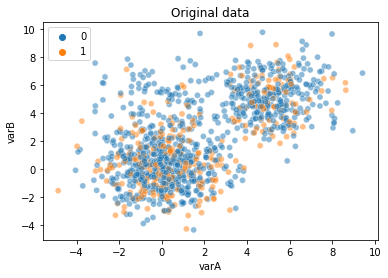

In [93]:
# plot the original data as per the target class

sns.scatterplot(data = X, x = 'varA', y = 'varB', hue = y, alpha=0.5)
plt.title('Original data')
plt.show()

## KMEANS SMOTE

[KMeansSMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.KMeansSMOTE.html)

In [94]:
# create SVM SMOTE

k_smote = KMeansSMOTE(sampling_strategy='auto', # samples from the minority class-- this is default
                        random_state=0,
                      cluster_balance_threshold=0.1, # if 10% of obs belongs to minority, then consider this sample
                     kmeans_estimator=KMeans(n_clusters=3, random_state=0), # setting up the KMEans to identify clusters
             k_neighbors=2,               # neighbours to generate new samples or synthetic samples,
                      density_exponent='auto',
             n_jobs=2) 

X_resampled, y_resampled = k_smote.fit_resample(X,y)
X_resampled.shape, y_resampled.shape

((1747, 2), (1747,))

In [95]:
# original data shape
X.shape, y.shape

((1200, 2), (1200,))

In [96]:
# balance values
# original data
y.value_counts()

0    873
1    327
dtype: int64

In [97]:
y_resampled.value_counts()

1    874
0    873
dtype: int64

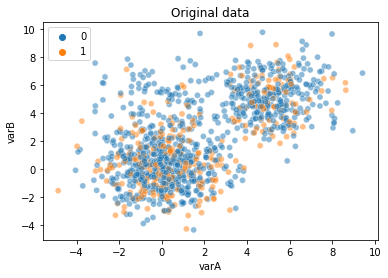

In [98]:
# plot the original data

sns.scatterplot(data = X, x = 'varA', y = 'varB', hue = y, alpha=0.5)
plt.title('Original data')
plt.show()

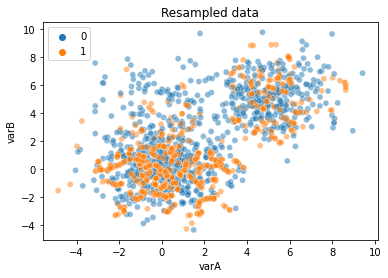

In [99]:
# plot the resampled data - Borderline 1

sns.scatterplot(data = X_resampled, x = 'varA', y = 'varB', hue = y_resampled, alpha=0.5)
plt.title('Resampled data')
plt.show()

We can see more synthetic samples are generated from the lower left cluster.

## Training a Random Forest and comparing model performance

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [115]:
def run_model(X, y):
    
    rf = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=39)
    
    rf.fit(X, y)
    
    # get predictions scores
    preds = rf.predict_proba(X)
    
    print('ROC AUC score')
    print('{}'.format(roc_auc_score(y, preds[:,1])))

In [116]:
# for Original Dataset
run_model(X,y)

ROC AUC score
0.6985630764596054


In [117]:
# for Resampled Dataset
run_model(X_resampled,y_resampled)

ROC AUC score
0.7386592695694114


## Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
def run_model_log(X, y):
    
    log = LogisticRegression(max_iter=500, random_state=39)
    
    log.fit(X, y)
    
    # get predictions scores
    preds = log.predict_proba(X)
    
    print('ROC AUC score')
    print('{}'.format(roc_auc_score(y, preds[:,1])))

In [109]:
# for Original Dataset
run_model_log(X,y)

ROC AUC score
0.5595944947122475


In [111]:
# for Resampled Dataset
run_model_log(X_resampled,y_resampled)

ROC AUC score
0.6310599447969991


- As per the metrics given by the two models, seems the performance did improve on the resampled data as compared to the original imbalanced data.